In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append(os.path.realpath('..'))

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import plotly.express as ex
import plotly.graph_objects as go

from tracking_v2.util import to_df

In [29]:
class ThrustMover:
    def __init__(self, thrust: float = 2000):
        self.air_density = 1.225
        self.area        = 1
        self.drag_coeff  = 0.3

        self.position  = 0
        self.velocity  = np.sqrt(thrust / (0.5 * self.air_density * self.area * self.drag_coeff)) # drag matches thrust
        self.thrust    = thrust
        self.mass      = 1000
        
        self.noise_intensity = 1

        self.trace = []

    def update(self, dt: float):
        velocity   = np.linalg.norm(self.velocity)
        drag_force = -0.5 * self.air_density * self.area * self.drag_coeff * velocity**2

        noise_force = np.random.normal(0, self.noise_intensity, 1)

        acceleration = (self.thrust + drag_force + noise_force) / self.mass

        self.velocity += acceleration * dt
        self.position += self.velocity * dt

        self.trace.append((self.position[0], self.velocity[0]))

In [34]:
mover = ThrustMover()
print(mover.velocity)

for _ in range(500):
    mover.update(.1)

104.32810619146022


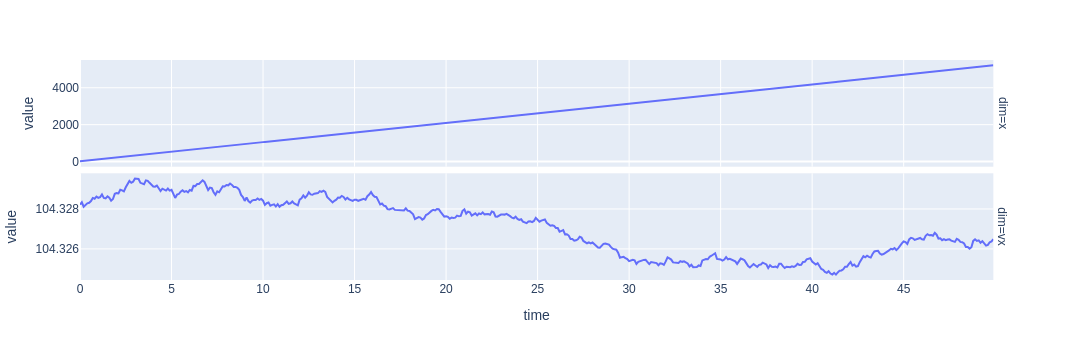

In [36]:
trace = np.hstack((np.arange(len(mover.trace)).reshape((-1, 1)) / 10, np.asarray(mover.trace)))
df = to_df(trace, columns=['time', 'x', 'vx'])

fig = ex.line(df.melt(['time'], ['x', 'vx'], 'dim', 'value'), x='time', y='value', facet_row='dim')
fig.update_yaxes(matches=None)
fig